In [158]:
import pandas as pd
df = pd.read_csv('df_actions.csv')
df

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,loss,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct,rate
0,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0xe057e6386047c690f6d2804ecd61e68441774bbc,-1.0,210.092115,0.0,2070.806419,435060.100509,210.092115,210.092115,280003.316963,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,280003.316963,100.0,0.042760
1,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x4f5ef03e870332a1b42453bbf57b8a041e89efe8,-1.0,10.200589,0.0,2070.806419,21123.444373,10.200589,0.000000,11400.000000,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,11400.000000,100.0,0.042760
2,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x63b1efc5602c0023bbb373f2350cf34c2e5f8669,-1.0,0.177379,0.0,2070.806419,367.318075,0.177379,0.177379,250.002062,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,250.002062,100.0,0.042760
3,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x7a16ff8270133f063aab6c9977183d9e72835428,-1.0,305.268629,0.0,2070.806419,632152.236884,305.268629,305.268629,545901.980554,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,545901.980554,100.0,0.042760
4,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x2761a575cf6ea58d9d59426f1733df573d92cf36,-1.0,443.867235,0.0,2070.806419,919163.118863,443.867235,443.867235,761789.990125,...,0.0,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,761789.990125,100.0,0.042760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7542,0xe0438eb3703bf871e31ce639bd351109c88666ea-170...,0x93208ff8d7abba4d871626a5a31643e08d52a18a,NaN,0.000000,0.0,37012.485905,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,2023-11-27 16:09:11,0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,-169216.547458,-100.0,0.072640
7543,0x1681195c176239ac5e72d9aebacf5b2492e0c4ee-170...,0x0f75cb9bb4cda0e98227a8014bc8802d650dbf17,NaN,0.000000,0.0,2024.347796,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,2023-11-27 16:09:11,0xa920de414ea4ab66b97da1bfe9e6eca7d4219635,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-7096.314895,-100.0,0.071212
7544,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-170...,0xb386b3370f3c258d241fed394050d60f7c421be7,NaN,0.000000,0.0,2322.947305,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,2023-11-27 16:09:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-20508.610958,-100.0,0.114161
7545,0xf9bd9da2427a50908c4c6d1599d8e62837c2bcb0-170...,0x0a02aa6db3d88e73433c789ddcf375c3434ccc6d,NaN,0.000000,0.0,36992.993568,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,2023-11-27 16:09:11,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC,-462343.681096,-100.0,0.071067


In [159]:
def label_action(x):
    if x <= -99:
        return 'close'
    elif x < 0:
        return 'reduce'
    elif x == 100 or x > 300:
        return 'open'
    return 'add'

df['action_type'] = df['debt_change_pct'].apply(label_action)
df.loc[df['action_type'] == 'open', 'debt_change_pct'] = 100
df

,userStateSnapshotId,user,activeBand,collateral,stablecoin,oraclePrice,collateralUsd,collateralUp,depositedCollateral,debt,...,lossPct,softLiq,timestamp,marketId,collateral.1,collateralName,debt_change,debt_change_pct,rate,action_type
0,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0xe057e6386047c690f6d2804ecd61e68441774bbc,-1.0,210.092115,0.0,2070.806419,435060.100509,210.092115,210.092115,280003.316963,...,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,280003.316963,100.0,0.042760,open
1,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x4f5ef03e870332a1b42453bbf57b8a041e89efe8,-1.0,10.200589,0.0,2070.806419,21123.444373,10.200589,0.000000,11400.000000,...,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,11400.000000,100.0,0.042760,open
2,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x63b1efc5602c0023bbb373f2350cf34c2e5f8669,-1.0,0.177379,0.0,2070.806419,367.318075,0.177379,0.177379,250.002062,...,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,250.002062,100.0,0.042760,open
3,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x7a16ff8270133f063aab6c9977183d9e72835428,-1.0,305.268629,0.0,2070.806419,632152.236884,305.268629,305.268629,545901.980554,...,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,545901.980554,100.0,0.042760,open
4,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-168...,0x2761a575cf6ea58d9d59426f1733df573d92cf36,-1.0,443.867235,0.0,2070.806419,919163.118863,443.867235,443.867235,761789.990125,...,0.0,False,2023-06-08 04:54:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,761789.990125,100.0,0.042760,open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7542,0xe0438eb3703bf871e31ce639bd351109c88666ea-170...,0x93208ff8d7abba4d871626a5a31643e08d52a18a,NaN,0.000000,0.0,37012.485905,NaN,NaN,NaN,0.000000,...,NaN,NaN,2023-11-27 16:09:11,0x4e59541306910ad6dc1dac0ac9dfb29bd9f15c67,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,WBTC,-169216.547458,-100.0,0.072640,close
7543,0x1681195c176239ac5e72d9aebacf5b2492e0c4ee-170...,0x0f75cb9bb4cda0e98227a8014bc8802d650dbf17,NaN,0.000000,0.0,2024.347796,NaN,NaN,NaN,0.000000,...,NaN,NaN,2023-11-27 16:09:11,0xa920de414ea4ab66b97da1bfe9e6eca7d4219635,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,-7096.314895,-100.0,0.071212,close
7544,0x37417b2238aa52d0dd2d6252d989e728e8f706e4-170...,0xb386b3370f3c258d241fed394050d60f7c421be7,NaN,0.000000,0.0,2322.947305,NaN,NaN,NaN,0.000000,...,NaN,NaN,2023-11-27 16:09:11,0x100daa78fc509db39ef7d04de0c1abd299f4c6ce,0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0,wstETH,-20508.610958,-100.0,0.114161,close
7545,0xf9bd9da2427a50908c4c6d1599d8e62837c2bcb0-170...,0x0a02aa6db3d88e73433c789ddcf375c3434ccc6d,NaN,0.000000,0.0,36992.993568,NaN,NaN,NaN,0.000000,...,NaN,NaN,2023-11-27 16:09:11,0x1c91da0223c763d2e0173243eadaa0a2ea47e704,0x18084fba666a33d37592fa2633fd49a74dd93a88,tBTC,-462343.681096,-100.0,0.071067,close


In [160]:
df.columns

Index(['userStateSnapshotId', 'user', 'activeBand', 'collateral', 'stablecoin',
       'oraclePrice', 'collateralUsd', 'collateralUp', 'depositedCollateral',
       'debt', 'n', 'n1', 'n2', 'health', 'loss', 'lossPct', 'softLiq',
       'timestamp', 'marketId', 'collateral.1', 'collateralName',
       'debt_change', 'debt_change_pct', 'rate', 'action_type'],
      dtype='object')

### Features:

For each user on each market:
- debt_change_pct avg (for everything that's not close or open), 0 if nothing
- open_debt_size (debt amount for open action, normalized by average debt on market)
- position_duration (delta between position open timestamp and position close timestamp, if no close time delta between current time and first open time, if multiple positions were opened and then closed we compute the duration of all positions and take the median)
- open_rate (rate at which a position was opened, if multiple positions were opened we take the average of the rates of all position opening)
- reduce_rate (rate at which user reduced position, if there are multiple adds we take the average, 0 if no reduce)
- add_rate (rate at which user added to position, if there are multiple adds we take the average, 0 if no adds)
- close_rate (rate at which a position was closed, if multiple positions were opened we take the average of the rates of all positions closed, if there are not close 0)
- action_count (number of actions taken by the user)
- close_count (number of positions closed by the user on that market)
- soft_liq (if users was ever in soft_liq, for NaN (close position) we replace by False)
- open_price (oraclePrice (normalized by average oraclePrice for the market) at the time the user opened the position)
- avg_health (average health of the user (ignore NaNs) over a position, if multiple position we take the average of the average of those positions)
- max_loss (max loss in % incurred by the users over the duration of a position, if multiple positions we take the average)


In [161]:
debt_change_pct_avg = df[df['action_type'].isin(['reduce', 'add'])].groupby(['user', 'marketId'])['debt_change_pct'].mean().reset_index().fillna(0)
debt_change_pct_avg.rename(columns={'debt_change_pct': 'debt_change_pct_avg'}, inplace=True)

In [162]:
avg_debt_per_market = df.groupby('marketId')['debt'].mean().reset_index()
df = df.merge(avg_debt_per_market, on='marketId', how='left', suffixes=('', '_market_avg'))
df['open_debt_size'] = df.apply(lambda x: x['debt']/x['debt_market_avg'] if x['action_type'] == 'open' else 0, axis=1)
open_debt_size_agg = df[df['action_type'] == 'open'].groupby(['user', 'marketId'])['open_debt_size'].mean().reset_index()

In [229]:
import numpy as np

def calculate_position_duration(user_df):
    user_df['timestamp'] = pd.to_datetime(user_df['timestamp'])

    open_times = user_df[user_df['action_type'] == 'open']['timestamp']
    close_times = user_df[user_df['action_type'] == 'close']['timestamp']

    if open_times.empty:
        return 0

    if close_times.empty:
        close_times = pd.Series(pd.Timestamp.now())

    durations = []
    for open_time in open_times:
        subsequent_close_times = close_times[close_times >= open_time]
        if not subsequent_close_times.empty:
            closest_close_time = subsequent_close_times.iloc[0]
            duration = (closest_close_time - open_time).total_seconds() / 3600  # Convert to hours
            durations.append(duration)
        else:
            duration = (pd.Timestamp.now() - open_time).total_seconds() / 3600
            durations.append(duration)

    return np.median(durations) if durations else 0

position_duration = df.groupby(['user', 'marketId']).apply(calculate_position_duration).reset_index()
position_duration.rename(columns={0: 'position_duration'}, inplace=True)

In [164]:
avg_rate_per_market = df.groupby('marketId')['rate'].mean().reset_index()
df = df.merge(avg_rate_per_market, on='marketId', how='left', suffixes=('', '_market_avg'))

# open rate
open_rate = df[df['action_type'] == 'open'].groupby(['user', 'marketId'])['rate'].mean().reset_index()
open_rate['open_rate'] = open_rate['rate'] / df['rate_market_avg']
open_rate.drop(columns='rate', inplace=True)

# reduce rate
reduce_rate = df[df['action_type'] == 'reduce'].groupby(['user', 'marketId'])['rate'].mean().reset_index()
reduce_rate['reduce_rate'] = reduce_rate['rate'] / df['rate_market_avg']
reduce_rate.drop(columns='rate', inplace=True)

# add rate
add_rate = df[df['action_type'] == 'add'].groupby(['user', 'marketId'])['rate'].mean().reset_index()
add_rate['add_rate'] = add_rate['rate'] / df['rate_market_avg']
add_rate.drop(columns='rate', inplace=True)

# close rate
close_rate = df[df['action_type'] == 'close'].groupby(['user', 'marketId'])['rate'].mean().reset_index()
close_rate['close_rate'] = close_rate['rate'] / df['rate_market_avg']
close_rate.drop(columns='rate', inplace=True)

# nas
reduce_rate = df[['user', 'marketId']].drop_duplicates().merge(reduce_rate, on=['user', 'marketId'], how='left')
reduce_rate['reduce_rate'].fillna(0, inplace=True)

add_rate = df[['user', 'marketId']].drop_duplicates().merge(add_rate, on=['user', 'marketId'], how='left')
add_rate['add_rate'].fillna(0, inplace=True)

close_rate = df[['user', 'marketId']].drop_duplicates().merge(close_rate, on=['user', 'marketId'], how='left')
close_rate['close_rate'].fillna(0, inplace=True)

In [165]:
action_count = df.groupby(['user', 'marketId']).size().reset_index(name='action_count')
close_counts = df[df['action_type'] == 'close'].groupby(['user', 'marketId']).size().reset_index(name='close_count')

In [166]:
df['softLiq'].fillna(False, inplace=True)

# Determine if the user ever experienced soft liquidation
soft_liq = df.groupby(['user', 'marketId'])['softLiq'].any().reset_index()
soft_liq.rename(columns={'softLiq': 'soft_liq'}, inplace=True)

In [167]:
# Calculate the average oracle price per market
avg_oracle_price = df.groupby('marketId')['oraclePrice'].mean().reset_index()

# Merge this average back into the original dataframeopen_debt_size_agg = df[df['action_type'] == 'open'].groupby(['user', 'marketId'])['open_debt_size'].mean().reset_index()

df = df.merge(avg_oracle_price, on='marketId', how='left', suffixes=('', '_market_avg'))

# Calculate normalized open price
open_price = df[df['action_type'] == 'open']
open_price['open_price'] = open_price['oraclePrice'] / open_price['oraclePrice_market_avg']
open_price = open_price[['user', 'marketId', 'open_price']].drop_duplicates()
open_price_agg = open_price.groupby(['user', 'marketId'])['open_price'].mean().reset_index()

/tmp/ipykernel_260903/4244395065.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  open_price['open_price'] = open_price['oraclePrice'] / open_price['oraclePrice_market_avg']


In [168]:
avg_health = df.groupby(['user', 'marketId'])['health'].mean().reset_index()
avg_health.rename(columns={'health': 'avg_health'}, inplace=True)

In [169]:
# Find the maximum loss for each position
max_loss_per_position = df.groupby(['user', 'marketId'])['lossPct'].max().reset_index()

# Calculate the average of these maximum losses
max_loss = max_loss_per_position.groupby(['user', 'marketId'])['lossPct'].mean().reset_index()
max_loss.rename(columns={'lossPct': 'max_loss'}, inplace=True)

In [170]:
user_market_df = df[['user', 'marketId']].drop_duplicates()

user_market_df = user_market_df.merge(debt_change_pct_avg, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(open_debt_size_agg, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(position_duration, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(open_rate, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(reduce_rate, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(add_rate, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(close_rate, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(action_count, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(soft_liq, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(avg_health, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(max_loss, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(close_counts, on=['user', 'marketId'], how='left')
user_market_df = user_market_df.merge(open_price_agg, on=['user', 'marketId'], how='left')

user_market_df['close_count'].fillna(0, inplace=True)
user_market_df['debt_change_pct_avg'] = user_market_df['debt_change_pct_avg'].fillna(0)

## Encoding & scaling for clustering

In [172]:
from sklearn.preprocessing import LabelEncoder

le_marketId = LabelEncoder()

user_market_df['marketId_encoded'] = le_marketId.fit_transform(user_market_df['marketId'])

In [199]:
features = user_market_df[['debt_change_pct_avg', 'open_rate', 'reduce_rate', 'position_duration', 'open_debt_size',
                           'add_rate', 'close_rate', 'action_count', 'close_count', 'soft_liq', 'open_price', 'avg_health', 'max_loss']]

In [202]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_to_scale = features #.drop(columns=['marketId_encoded'])
scaled_features = scaler.fit_transform(features_to_scale)
scaled_features_df = pd.DataFrame(scaled_features, columns=features_to_scale.columns, index=features_to_scale.index)


## K-means

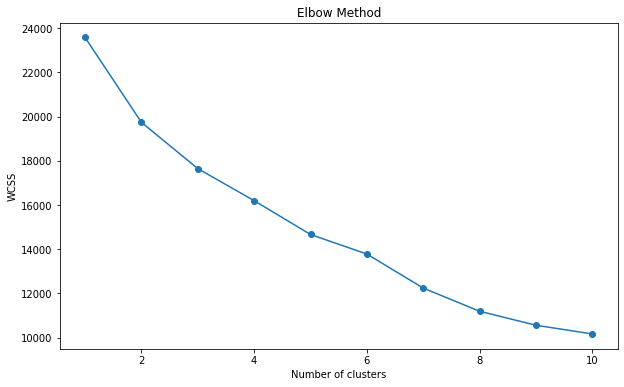

In [203]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features_df)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [204]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
user_market_df['cluster'] = kmeans.fit_predict(features)

In [208]:
print("### AVGS ####")
cluster_analysis = user_market_df.groupby('cluster').mean()
print(cluster_analysis)
print("### MEDIANS ####")
cluster_analysis = user_market_df.groupby('cluster').median()
print(cluster_analysis)

### AVGS ####
         debt_change_pct_avg  open_debt_size  position_duration  open_rate  \
cluster                                                                      
0                  11.640285        0.603109         692.327094   0.926580   
1                  14.361665        0.413515        2813.188277   0.652877   

         reduce_rate  add_rate  close_rate  action_count  soft_liq  \
cluster                                                              
0           0.320964  0.418145    0.531228      3.761134  0.236437   
1           0.394909  0.536797    0.313664      5.012090  0.281520   

         avg_health  max_loss  close_count  open_price  marketId_encoded  
cluster                                                                   
0          2.298114  3.056235     0.687449    1.001154          1.523887  
1          0.086308  6.057093     0.255613    0.956765          1.093264  
### MEDIANS ####


/tmp/ipykernel_260903/314080520.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = user_market_df.groupby('cluster').mean()
/tmp/ipykernel_260903/314080520.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_analysis = user_market_df.groupby('cluster').median()


         debt_change_pct_avg  open_debt_size  position_duration  open_rate  \
cluster                                                                      
0                        0.0        0.086650         613.603930   0.928986   
1                        0.0        0.064691        2630.153784   0.577406   

         reduce_rate  add_rate  close_rate  action_count  soft_liq  \
cluster                                                              
0                0.0  0.000000    0.218959           2.0       0.0   
1                0.0  0.465965    0.000000           3.0       0.0   

         avg_health  max_loss  close_count  open_price  marketId_encoded  
cluster                                                                   
0          0.038925       0.0          1.0    1.008002               2.0  
1          0.039008       0.0          0.0    0.952468               0.0  


In [209]:
user_market_df['cluster'].value_counts()

0    1235
1     579
Name: cluster, dtype: int64

## Hierarchical clustering

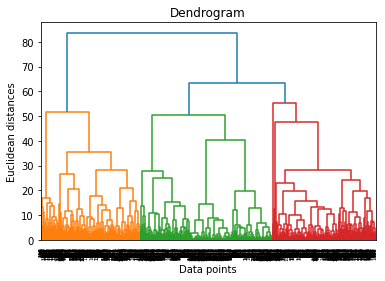

In [210]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(scaled_features_df, method='ward'))

plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Euclidean distances')
plt.show()

In [211]:
hc = sch.linkage(scaled_features_df, method='ward')
from scipy.cluster.hierarchy import fcluster

distance_threshold = 60
clusters = fcluster(hc, distance_threshold, criterion='distance')

user_market_df['cluster'] = clusters

print(user_market_df['cluster'].value_counts())

2    717
3    557
1    540
Name: cluster, dtype: int64


In [212]:
print("#### MEANS ####")
cluster_means = user_market_df.groupby('cluster').mean()
print(cluster_means)
print("#### MEDIANS ####")
cluster_means = user_market_df.groupby('cluster').median()
print(cluster_means)

#### MEANS ####
         debt_change_pct_avg  open_debt_size  position_duration  open_rate  \
cluster                                                                      
1                   6.536136        0.248740        1564.296765   0.898473   
2                  23.318248        0.209048        1594.212767   0.913243   
3                   4.385025        1.256835         890.644822   0.686484   

         reduce_rate  add_rate  close_rate  action_count  soft_liq  \
cluster                                                              
1           0.951863  0.727907    0.546738      7.888889  0.829630   
2           0.013078  0.395366    0.020667      1.942817  0.004184   
3           0.182513  0.270498    0.947254      3.400359  0.007181   

         avg_health   max_loss  close_count  open_price  marketId_encoded  
cluster                                                                    
1          0.061462  13.074081     0.668519    0.995736          0.927778  
2          0.0

/tmp/ipykernel_260903/3471648907.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = user_market_df.groupby('cluster').mean()
/tmp/ipykernel_260903/3471648907.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = user_market_df.groupby('cluster').median()


In [213]:
user_market_df.describe()

,debt_change_pct_avg,open_debt_size,position_duration,open_rate,reduce_rate,add_rate,close_rate,action_count,avg_health,max_loss,close_count,open_price,marketId_encoded,cluster
count,1814.000000,1.814000e+03,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000,1814.000000
mean,12.508906,5.425934e-01,1369.272311,0.839219,0.344566,0.456017,0.461785,4.160419,1.592141,4.014061,0.549614,0.986986,1.386439,2.009372
std,33.237080,1.866156e+00,1130.621966,0.521243,0.532597,0.579897,0.630249,4.777124,38.975884,13.179477,0.652136,0.084495,1.391826,0.777809
min,-98.678422,1.464975e-11,4.000000,0.008474,0.000000,0.000000,0.000000,1.000000,0.029073,0.000000,0.000000,0.772859,0.000000,1.000000
25%,0.000000,2.587628e-02,438.133294,0.395308,0.000000,0.000000,0.000000,2.000000,0.036673,0.000000,0.000000,0.922677,0.000000,1.000000
50%,0.000000,8.194214e-02,980.070000,0.843032,0.000000,0.000000,0.000000,3.000000,0.038959,0.000000,0.000000,0.991119,2.000000,2.000000
75%,14.691217,2.733687e-01,2186.136820,1.171347,0.739838,0.919632,0.904133,5.000000,0.043154,0.145677,1.000000,1.043652,3.000000,3.000000
max,299.858560,2.578146e+01,4241.274112,2.708309,2.398618,2.765684,2.569941,65.000000,1521.651208,99.668115,4.000000,1.209609,4.000000,3.000000


In [214]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(scaled_features_df)

pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(scaled_features_df)

In [215]:
pca_2d_loadings = pd.DataFrame(abs(pca_2d.components_), columns=scaled_features_df.columns)

for i in range(len(pca_2d_loadings)):
    print(f"Principal Component {i+1}:")
    loadings_sorted = pca_2d_loadings.iloc[i].sort_values(ascending=False)
    print(loadings_sorted)
    print("\n")

Principal Component 1:
action_count           0.476656
reduce_rate            0.448914
soft_liq               0.438144
max_loss               0.388845
add_rate               0.316569
close_count            0.255296
close_rate             0.233018
position_duration      0.071572
open_price             0.038941
open_debt_size         0.035780
open_rate              0.018135
debt_change_pct_avg    0.009936
avg_health             0.008277
Name: 0, dtype: float64


Principal Component 2:
close_count            0.540409
close_rate             0.504617
position_duration      0.442271
add_rate               0.333751
debt_change_pct_avg    0.316127
open_debt_size         0.110279
avg_health             0.104720
action_count           0.094207
reduce_rate            0.068476
max_loss               0.062987
soft_liq               0.054939
open_price             0.052032
open_rate              0.002267
Name: 1, dtype: float64




In [216]:
pca_3d_loadings = pd.DataFrame(abs(pca_3d.components_), columns=scaled_features_df.columns)

for i in range(len(pca_3d_loadings)):
    print(f"Principal Component {i+1}:")
    loadings_sorted = pca_3d_loadings.iloc[i].sort_values(ascending=False)
    print(loadings_sorted)
    print("\n")

Principal Component 1:
action_count           0.476655
reduce_rate            0.448915
soft_liq               0.438143
max_loss               0.388845
add_rate               0.316570
close_count            0.255298
close_rate             0.233016
position_duration      0.071573
open_price             0.038940
open_debt_size         0.035780
open_rate              0.018135
debt_change_pct_avg    0.009936
avg_health             0.008277
Name: 0, dtype: float64


Principal Component 2:
close_count            0.540430
close_rate             0.504603
position_duration      0.442263
add_rate               0.333748
debt_change_pct_avg    0.316127
open_debt_size         0.110278
avg_health             0.104720
action_count           0.094216
reduce_rate            0.068467
max_loss               0.062986
soft_liq               0.054947
open_price             0.052034
open_rate              0.002264
Name: 1, dtype: float64


Principal Component 3:
open_price             0.621989
open_rate      

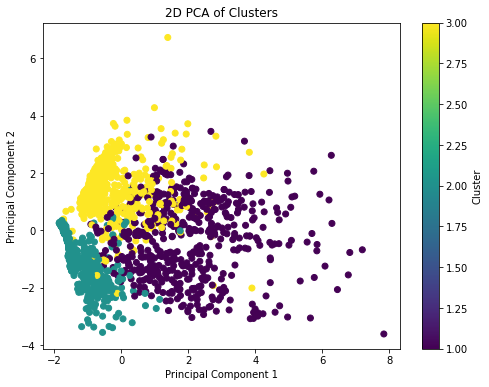

In [228]:
plt.figure(figsize=(8, 6))
plt.scatter(principal_components_2d[:, 0], principal_components_2d[:, 1], c=user_market_df['cluster'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Clusters')
plt.colorbar(label='Cluster')
plt.show()

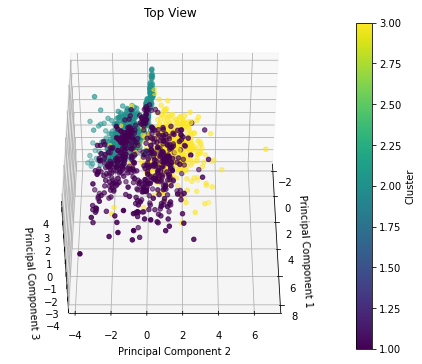

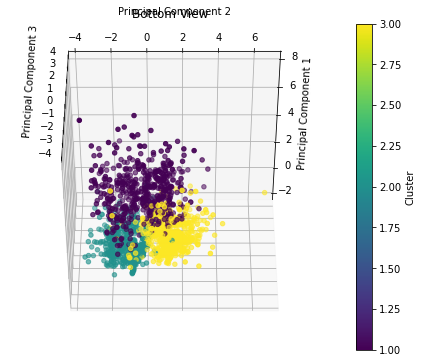

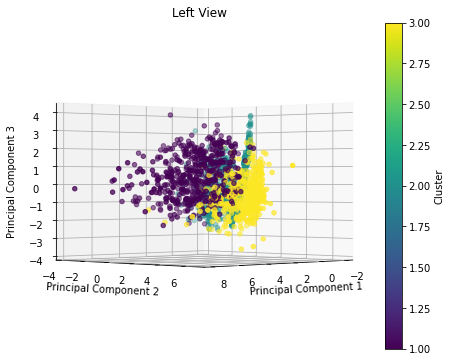

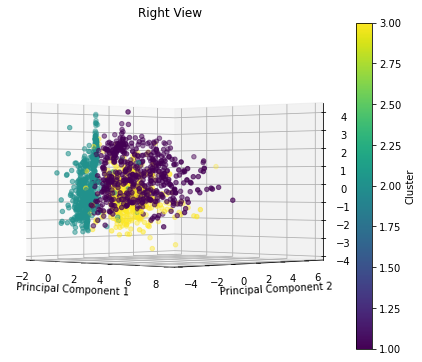

In [218]:
def plot_3d_scatter(elev, azim, title):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(principal_components_3d[:, 0], principal_components_3d[:, 1], principal_components_3d[:, 2], c=user_market_df['cluster'])
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    ax.set_title(title)
    plt.colorbar(scatter, label='Cluster')
    plt.show()

plot_3d_scatter(elev=45, azim=0, title='Top View')
plot_3d_scatter(elev=-45, azim=0, title='Bottom View')
plot_3d_scatter(elev=0, azim=45, title='Left View')
plot_3d_scatter(elev=0, azim=-45, title='Right View')

Clusters are mostly defined by management style: 
- Cluster 0: Active management, more likely to suffer loss, be in soft-liquidation. Positions remain open for long
- Cluster 1: Passive management, users who just open a position and let it run. Positions remain open for long
- Cluster 2: Active short-term management, users who keep positions open for a short time, open positions when rates are low and close when they are higher. These users also have the largest debt positions.